In [562]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyfolio as pf
import pandas_datareader.data as web
import matplotlib.gridspec as gridspec
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### No site da B3 coneguimos baixar um arquivo com a composição dos Indices Bovespa e IBRX50 ###

In [2]:
ibov = pd.read_csv("IBOVcomposicao.csv", sep=';', encoding='ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
ibov = ibov.rename(columns = {'Código':'Cod','Ação':'Empresa','Qtd. Teórica':'Qtd_teorica','Part. (%)':'Part'})
ibov.shape

(92, 5)

In [3]:
ibrx50 = pd.read_csv("IBXL50composicao.csv", sep=';', encoding='ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
ibrx50 = ibrx50.rename(columns = {'Código':'Cod','Ação':'Empresa','Qtd. Teórica':'Qtd_teorica','Part. (%)':'Part'})
ibrx50.head()

,Cod,Empresa,Tipo,Qtde. Teórica,Part
0,RRRP3,3R PETROLEUM,ON NM,200453863,0.426
1,ABEV3,AMBEV S/A,ON,4386652506,3.689
2,AMER3,AMERICANAS,ON NM,596086291,0.564
3,ASAI3,ASSAI,ON NM,795949801,0.788
4,AZUL4,AZUL,PN N2,327646296,0.310


In [4]:
data_inicial = "01/01/2019"
data_final = "01/01/2022"
cot_ibov = pd.DataFrame()
index = []
for empresa in ibov.Cod: 
        df = web.DataReader(f'{empresa}.SA', data_source='yahoo', start=data_inicial, end=data_final)
        df = df.rename(columns={'Adj Close':f'{empresa}'})
        cot_ibov = pd.concat([cot_ibov, df[f'{empresa}']], axis=1)
        index.append(empresa)


In [5]:
data_inicial = "01/01/2019"
data_final = "01/01/2022"
cot_ibrx50 = pd.DataFrame()
index = []
for empresa in ibrx50.Cod: 
        df = web.DataReader(f'{empresa}.SA', data_source='yahoo', start=data_inicial, end=data_final)
        df = df.rename(columns={'Adj Close':f'{empresa}'})
        cot_ibrx50 = pd.concat([cot_ibrx50, df[f'{empresa}']], axis=1)
        index.append(empresa)


In [171]:
data_inicial = "01/01/2019"
data_final = "01/01/2022"

benchmark = web.DataReader('^BVSP', data_source='yahoo', start=data_inicial, end=data_final)
benchmark

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,91479,87536,87887,91012,5615400,91012
2019-01-03,91596,89922,91011,91564,6066200,91564
2019-01-04,92701,90824,91577,91841,5322100,91841
2019-01-07,92552,91288,91845,91699,4565000,91699
2019-01-08,92231,91064,91699,92032,4496500,92032
...,...,...,...,...,...,...
2021-12-23,105453,104637,105251,104891,7283600,104891
2021-12-27,105694,104798,104892,105531,7594900,105531
2021-12-28,105652,104503,105555,104864,7509000,104864


In [194]:
cot_ibov['Ibovespa'] = benchmark['Adj Close']
cot_ibov

,RRRP3,ALPA4,ABEV3,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BPAN4,BBSE3,...,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3,Ibovespa
2019-01-02,NaN,13.824488,14.685471,41.664917,52.034325,NaN,36.330002,7.967908,1.852455,21.315544,...,10.517093,9.261151,24.992414,8.330025,37.180229,4.38,19.462721,8.553487,23.392006,91012
2019-01-03,NaN,13.848187,14.849149,42.091255,52.288342,NaN,36.369999,8.314839,1.796881,21.548866,...,10.453076,9.474499,24.527889,8.150794,35.659248,4.31,19.911860,8.748532,23.373180,91564
2019-01-04,NaN,13.745491,15.049197,40.695965,50.171589,NaN,36.250000,8.013783,1.824668,21.338121,...,10.505692,9.736331,24.362312,8.628745,37.980740,4.27,19.986719,8.848435,23.730881,91841
2019-01-07,NaN,13.713892,14.985545,38.893715,49.418964,NaN,35.299999,7.970778,1.806144,21.022001,...,10.847698,9.526217,23.617233,8.645816,37.776974,4.24,20.099001,8.710475,23.260218,91699
2019-01-08,NaN,13.982482,14.685471,40.695965,50.848949,NaN,34.720001,7.993713,1.806144,20.713409,...,11.259856,9.138315,23.226295,8.404258,38.140850,4.04,19.425291,8.639117,23.476725,92032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,31.270000,36.379086,15.550000,30.124914,73.122292,13.976556,26.459999,10.993008,10.815247,19.152811,...,12.471383,28.504419,13.673858,14.098693,72.463844,4.50,20.543537,32.978848,20.177418,104891
2021-12-27,31.770000,36.488602,15.530000,31.271875,73.851837,13.530179,25.670000,10.925388,10.466367,19.273560,...,12.490765,28.573845,13.951743,14.269472,72.280739,4.86,20.807165,32.683250,19.919369,105531
2021-12-28,32.070000,36.588161,15.520000,30.419008,74.039154,12.994527,25.750000,10.780488,10.496270,19.310715,...,12.364791,28.087862,13.999653,13.994329,70.541252,4.95,20.963390,32.801487,20.703440,104864
2021-12-29,33.480000,36.189922,15.450000,30.409204,73.329323,12.736620,23.860001,10.703209,10.546110,19.199251,...,12.490765,27.788948,13.798427,14.041768,70.724350,5.02,20.602121,32.259560,20.167492,104107


In [195]:
cot_ibrx50['Ibovespa'] = benchmark['Adj Close']
cot_ibrx50

,RRRP3,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBSE3,BRML3,BBDC4,BRAP4,...,RAIL3,CSNA3,SUZB3,TOTS3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,Ibovespa
2019-01-02,NaN,14.685471,41.664917,NaN,36.330002,7.967908,21.315540,12.450920,21.335144,17.850550,...,16.931480,7.685321,36.768875,9.261153,8.330025,37.180229,4.38,19.462723,8.553486,91012
2019-01-03,NaN,14.849148,42.091255,NaN,36.369999,8.314837,21.548868,12.534173,21.551285,17.167299,...,17.420944,7.777111,35.197155,9.474498,8.150794,35.659252,4.31,19.911861,8.748533,91564
2019-01-04,NaN,15.049197,40.695965,NaN,36.250000,8.013782,21.338121,12.293666,21.382162,18.327097,...,17.181208,8.135923,35.787735,9.736331,8.628745,37.980740,4.27,19.986717,8.848433,91841
2019-01-07,NaN,14.985545,38.893715,NaN,35.299999,7.970776,21.022001,12.219664,21.635841,18.470636,...,16.881533,8.152614,34.149330,9.526217,8.645815,37.776974,4.24,20.099001,8.710474,91699
2019-01-08,NaN,14.685471,40.695965,NaN,34.720001,7.993714,20.713409,12.238162,21.767950,18.338583,...,17.101294,8.177648,34.482731,9.138316,8.404258,38.140846,4.04,19.425295,8.639118,92032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,31.270000,15.550000,30.124914,13.976556,26.459999,10.993007,19.152809,7.686333,17.142088,22.717564,...,17.650692,24.058908,58.593819,28.504419,14.098693,72.463852,4.50,20.543537,32.978848,104891
2021-12-27,31.770000,15.530000,31.271875,13.530179,25.670000,10.925388,19.273560,7.855372,17.338099,23.323111,...,17.780550,24.322433,58.739841,28.573845,14.269472,72.280739,4.86,20.807165,32.683247,105531
2021-12-28,32.070000,15.520000,30.419008,12.994527,25.750000,10.780489,19.310715,8.074129,17.275726,23.181187,...,17.510847,24.351715,58.077877,28.087862,13.994329,70.541245,4.95,20.963390,32.801487,104864
2021-12-29,33.480000,15.450000,30.409204,12.736620,23.860001,10.703209,19.199253,8.113903,17.195543,23.171724,...,17.480879,24.439556,57.474316,27.788948,14.041768,70.724350,5.02,20.602121,32.259560,104107


In [196]:
#Preenchendo os Dados Faltantes no IBOV
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=20)
ibov_novo = pd.DataFrame(imputer.fit_transform(cot_ibov),columns = cot_ibov.columns, index=cot_ibov.index)
ibov_novo

,RRRP3,ALPA4,ABEV3,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BPAN4,BBSE3,...,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,YDUQ3,Ibovespa
2019-01-02,30.362500,13.824488,14.685471,41.664917,52.034325,13.726089,36.330002,7.967908,1.852455,21.315544,...,10.517093,9.261151,24.992414,8.330025,37.180229,4.38,19.462721,8.553487,23.392006,91012.0
2019-01-03,30.362500,13.848187,14.849149,42.091255,52.288342,13.726089,36.369999,8.314839,1.796881,21.548866,...,10.453076,9.474499,24.527889,8.150794,35.659248,4.31,19.911860,8.748532,23.373180,91564.0
2019-01-04,30.362500,13.745491,15.049197,40.695965,50.171589,13.726089,36.250000,8.013783,1.824668,21.338121,...,10.505692,9.736331,24.362312,8.628745,37.980740,4.27,19.986719,8.848435,23.730881,91841.0
2019-01-07,30.362500,13.713892,14.985545,38.893715,49.418964,13.726089,35.299999,7.970778,1.806144,21.022001,...,10.847698,9.526217,23.617233,8.645816,37.776974,4.24,20.099001,8.710475,23.260218,91699.0
2019-01-08,30.362500,13.982482,14.685471,40.695965,50.848949,13.726089,34.720001,7.993713,1.806144,20.713409,...,11.259856,9.138315,23.226295,8.404258,38.140850,4.04,19.425291,8.639117,23.476725,92032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,31.270000,36.379086,15.550000,30.124914,73.122292,13.976556,26.459999,10.993008,10.815247,19.152811,...,12.471383,28.504419,13.673858,14.098693,72.463844,4.50,20.543537,32.978848,20.177418,104891.0
2021-12-27,31.770000,36.488602,15.530000,31.271875,73.851837,13.530179,25.670000,10.925388,10.466367,19.273560,...,12.490765,28.573845,13.951743,14.269472,72.280739,4.86,20.807165,32.683250,19.919369,105531.0
2021-12-28,32.070000,36.588161,15.520000,30.419008,74.039154,12.994527,25.750000,10.780488,10.496270,19.310715,...,12.364791,28.087862,13.999653,13.994329,70.541252,4.95,20.963390,32.801487,20.703440,104864.0
2021-12-29,33.480000,36.189922,15.450000,30.409204,73.329323,12.736620,23.860001,10.703209,10.546110,19.199251,...,12.490765,27.788948,13.798427,14.041768,70.724350,5.02,20.602121,32.259560,20.167492,104107.0


In [197]:
#Preenchendo os Dados Faltantes no IBRX50

ibrx50_novo = pd.DataFrame(imputer.fit_transform(cot_ibrx50),columns = cot_ibrx50.columns,index=cot_ibrx50.index)
ibrx50_novo

,RRRP3,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBSE3,BRML3,BBDC4,BRAP4,...,RAIL3,CSNA3,SUZB3,TOTS3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,Ibovespa
2019-01-02,30.362500,14.685471,41.664917,13.726089,36.330002,7.967908,21.315540,12.450920,21.335144,17.850550,...,16.931480,7.685321,36.768875,9.261153,8.330025,37.180229,4.38,19.462723,8.553486,91012.0
2019-01-03,30.362500,14.849148,42.091255,13.726089,36.369999,8.314837,21.548868,12.534173,21.551285,17.167299,...,17.420944,7.777111,35.197155,9.474498,8.150794,35.659252,4.31,19.911861,8.748533,91564.0
2019-01-04,30.362500,15.049197,40.695965,13.726089,36.250000,8.013782,21.338121,12.293666,21.382162,18.327097,...,17.181208,8.135923,35.787735,9.736331,8.628745,37.980740,4.27,19.986717,8.848433,91841.0
2019-01-07,30.362500,14.985545,38.893715,13.726089,35.299999,7.970776,21.022001,12.219664,21.635841,18.470636,...,16.881533,8.152614,34.149330,9.526217,8.645815,37.776974,4.24,20.099001,8.710474,91699.0
2019-01-08,30.362500,14.685471,40.695965,13.726089,34.720001,7.993714,20.713409,12.238162,21.767950,18.338583,...,17.101294,8.177648,34.482731,9.138316,8.404258,38.140846,4.04,19.425295,8.639118,92032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,31.270000,15.550000,30.124914,13.976556,26.459999,10.993007,19.152809,7.686333,17.142088,22.717564,...,17.650692,24.058908,58.593819,28.504419,14.098693,72.463852,4.50,20.543537,32.978848,104891.0
2021-12-27,31.770000,15.530000,31.271875,13.530179,25.670000,10.925388,19.273560,7.855372,17.338099,23.323111,...,17.780550,24.322433,58.739841,28.573845,14.269472,72.280739,4.86,20.807165,32.683247,105531.0
2021-12-28,32.070000,15.520000,30.419008,12.994527,25.750000,10.780489,19.310715,8.074129,17.275726,23.181187,...,17.510847,24.351715,58.077877,28.087862,13.994329,70.541245,4.95,20.963390,32.801487,104864.0
2021-12-29,33.480000,15.450000,30.409204,12.736620,23.860001,10.703209,19.199253,8.113903,17.195543,23.171724,...,17.480879,24.439556,57.474316,27.788948,14.041768,70.724350,5.02,20.602121,32.259560,104107.0


In [12]:
#Quantidade de valores faltantes 

cot_ibrx50.isnull().sum().sum(), cot_ibov.isnull().sum().sum()

(2883, 5161)

In [13]:
#Quantidade de valores faltantes após preenchimento com valores médios dos vizinhos

ibrx50_novo.isnull().sum().sum(), ibov_novo.isnull().sum().sum()

(0, 0)

In [14]:
#DataFrame com ações do IBRX50 nos Ultimos 12 dias ordenados do mais recente para o mais antigo

df1 = ibrx50_novo.tail(12).sort_index(ascending=False)
df1

,RRRP3,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBSE3,BRML3,BBDC4,BRAP4,...,RDOR3,RAIL3,CSNA3,SUZB3,TOTS3,USIM5,VALE3,VIIA3,VBBR3,WEGE3
2021-12-30 00:00:00,33.549999,15.420000,30.958178,12.855654,24.360001,10.761169,19.273560,8.263057,17.115360,23.644810,...,44.336777,17.740595,24.390755,58.515942,28.536232,14.383324,71.374374,5.25,20.895042,32.496037
2021-12-29 00:00:00,33.480000,15.450000,30.409204,12.736620,23.860001,10.703209,19.199253,8.113903,17.195543,23.171724,...,43.862057,17.480879,24.439556,57.474316,27.788948,14.041768,70.724350,5.02,20.602121,32.259560
2021-12-28 00:00:00,32.070000,15.520000,30.419008,12.994527,25.750000,10.780489,19.310715,8.074129,17.275726,23.181187,...,45.335663,17.510847,24.351715,58.077877,28.087862,13.994329,70.541245,4.95,20.963390,32.801487
2021-12-27 00:00:00,31.770000,15.530000,31.271875,13.530179,25.670000,10.925388,19.273560,7.855372,17.338099,23.323111,...,44.227989,17.780550,24.322433,58.739841,28.573845,14.269472,72.280739,4.86,20.807165,32.683247
2021-12-23 00:00:00,31.270000,15.550000,30.124914,13.976556,26.459999,10.993007,19.152809,7.686333,17.142088,22.717564,...,42.190651,17.650692,24.058908,58.593819,28.504419,14.098693,72.463852,4.50,20.543537,32.978848
2021-12-22 00:00:00,31.480000,15.390000,30.017080,14.045992,26.799999,11.108927,19.050638,7.755937,17.088629,22.547251,...,42.279663,17.980331,24.166271,58.048668,29.030075,14.136644,73.168800,4.50,20.758347,33.175907
2021-12-21 00:00:00,30.840000,15.400000,30.193535,14.135267,26.440001,10.983348,19.059925,7.696276,17.008446,22.301247,...,44.821384,18.040266,24.244352,58.399124,28.881306,14.345373,73.553322,4.61,20.846222,33.422241
2021-12-20 00:00:00,30.299999,15.420000,30.477825,13.986476,24.510000,11.331636,18.929886,7.805655,17.081608,21.127995,...,44.702705,18.160135,23.141449,58.301777,28.930895,13.918427,71.667336,4.74,21.021975,33.510918
2021-12-17 00:00:00,32.299999,15.466399,30.703297,14.343576,25.420000,11.741788,19.078503,8.362491,17.442421,21.894394,...,45.370888,18.220070,24.859245,59.878815,29.446632,14.743855,72.482155,4.85,21.578526,34.307064
2021-12-16 00:00:00,31.670000,15.495273,30.605265,14.422933,24.850000,11.512866,19.440752,7.924976,17.944050,21.761992,...,45.370888,18.429840,25.200851,58.710640,30.091305,14.943097,73.644875,4.91,21.978849,35.045376


### $R_{Log}$ =  ln$( P_{t} / P_{ti} )$

 $R_{Log}$:  Retorno logarítmico da ação; 
 <br>
 $R_{t}$:  Preço da ação no dia em que foi vendida (preço final);
 <br>
 $R_{ti}$:  Preço da ação no dia em que foi comprada (preço inicial).

In [188]:
#DataFrame com o retorno logarítmico diário do IBRX50

df_log = np.log(ibrx50_novo/ibrx50_novo.shift(1))
df_log['Ibovespa'] = np.log(benchmark['Adj Close']/benchmark['Adj Close'].shift(1))
df_log.tail(12).sort_index(ascending=False)

,RRRP3,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBSE3,BRML3,BBDC4,BRAP4,...,RAIL3,CSNA3,SUZB3,TOTS3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,Ibovespa
2021-12-30 00:00:00,0.002089,-0.001944,0.017892,0.009302,0.020739,0.005401,0.003863,0.018216,-0.004674,0.020211,...,0.014748,-0.001999,0.017961,0.026536,0.024033,0.009149,0.044798,0.014118,0.007304,0.006844
2021-12-29 00:00:00,0.043027,-0.004521,-0.000322,-0.020047,-0.076231,-0.007194,-0.005789,0.004914,-0.004652,-0.000408,...,-0.001713,0.003601,-0.010447,-0.010699,0.003384,0.002592,0.014042,-0.017384,-0.016659,-0.007245
2021-12-28 00:00:00,0.009399,-0.000644,-0.027651,-0.040394,0.003112,-0.013351,0.001926,0.027467,-0.003604,-0.006104,...,-0.015285,0.001203,-0.011333,-0.017154,-0.019470,-0.024360,0.018349,0.007480,0.003611,-0.006340
2021-12-27 00:00:00,0.015863,-0.001287,0.037367,-0.032459,-0.030311,-0.006170,0.006285,0.021754,0.011370,0.026306,...,0.007330,0.010894,0.002489,0.002433,0.012040,-0.002530,0.076961,0.012751,-0.009004,0.006083
2021-12-23 00:00:00,-0.006693,0.010343,0.003586,-0.004956,-0.012768,-0.010490,0.005349,-0.009015,0.003123,0.007525,...,-0.018503,-0.004453,0.009347,-0.018273,-0.002688,-0.009681,0.000000,-0.010402,-0.005958,-0.003360
2021-12-22 00:00:00,0.020540,-0.000650,-0.005861,-0.006336,0.013524,0.011369,-0.000487,0.007722,0.004703,0.010971,...,-0.003328,-0.003226,-0.006019,0.005138,-0.014657,-0.005242,-0.024150,-0.004224,-0.007398,-0.002429
2021-12-21 00:00:00,0.017665,-0.001298,-0.009372,0.010582,0.075797,-0.031218,0.006846,-0.014112,-0.004292,0.054044,...,-0.006623,0.046558,0.001668,-0.001716,0.030214,0.025976,-0.027809,-0.008396,-0.002650,0.004560
2021-12-20 00:00:00,-0.063920,-0.003005,-0.007371,-0.025211,-0.036455,-0.035556,-0.007820,-0.068908,-0.020903,-0.035632,...,-0.003295,-0.071604,-0.026690,-0.017670,-0.057613,-0.011305,-0.022942,-0.026130,-0.023480,-0.020555
2021-12-17 00:00:00,0.019697,-0.001865,0.003198,-0.005517,0.022679,0.019689,-0.018809,0.053737,-0.028353,0.006066,...,-0.011447,-0.013648,0.019702,-0.021657,-0.013423,-0.015914,-0.012295,-0.018382,-0.021292,-0.009387
2021-12-16 00:00:00,0.070980,0.001243,0.085556,-0.010264,-0.025036,0.000829,-0.004767,-0.019877,0.012337,0.022481,...,-0.017195,0.058617,0.026037,-0.046999,0.032454,0.038396,-0.057385,0.000444,-0.000281,0.007811


### $R$ =  $( P_{t} - P_{ti}) / P_{ti} $

 $R$:  Retorno da ação; 
 <br>
 $R_{t}$:  Preço da ação no dia em que foi vendida (preço final);
 <br>
 $R_{ti}$:  Preço da ação no dia em que foi comprada (preço inicial).

In [187]:
#DataFrame com o retorno percentual diário do IBRX50

df_perc = ibrx50_novo.pct_change()
df_perc['Ibovespa'] = benchmark['Adj Close'].pct_change()
df_perc.tail(12).sort_index(ascending=False)

,RRRP3,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBSE3,BRML3,BBDC4,BRAP4,...,RAIL3,CSNA3,SUZB3,TOTS3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,Ibovespa
2021-12-30 00:00:00,0.002091,-0.001942,0.018053,0.009346,0.020956,0.005415,0.003870,0.018382,-0.004663,0.020416,...,0.014857,-0.001997,0.018123,0.026891,0.024324,0.009191,0.045817,0.014218,0.007330,0.006868
2021-12-29 00:00:00,0.043966,-0.004510,-0.000322,-0.019847,-0.073398,-0.007169,-0.005772,0.004926,-0.004641,-0.000408,...,-0.001711,0.003607,-0.010392,-0.010642,0.003390,0.002596,0.014141,-0.017233,-0.016521,-0.007219
2021-12-28 00:00:00,0.009443,-0.000644,-0.027273,-0.039589,0.003116,-0.013263,0.001928,0.027848,-0.003597,-0.006085,...,-0.015168,0.001204,-0.011269,-0.017008,-0.019282,-0.024066,0.018518,0.007508,0.003618,-0.006320
2021-12-27 00:00:00,0.015990,-0.001286,0.038074,-0.031938,-0.029856,-0.006151,0.006305,0.021992,0.011434,0.026655,...,0.007357,0.010953,0.002492,0.002436,0.012113,-0.002527,0.080000,0.012833,-0.008963,0.006102
2021-12-23 00:00:00,-0.006671,0.010396,0.003592,-0.004943,-0.012687,-0.010435,0.005363,-0.008974,0.003128,0.007554,...,-0.018333,-0.004443,0.009391,-0.018107,-0.002685,-0.009635,0.000000,-0.010348,-0.005940,-0.003354
2021-12-22 00:00:00,0.020752,-0.000649,-0.005844,-0.006316,0.013616,0.011434,-0.000487,0.007752,0.004714,0.011031,...,-0.003322,-0.003221,-0.006001,0.005151,-0.014550,-0.005228,-0.023861,-0.004215,-0.007370,-0.002427
2021-12-21 00:00:00,0.017822,-0.001297,-0.009328,0.010638,0.078743,-0.030736,0.006870,-0.014013,-0.004283,0.055531,...,-0.006601,0.047659,0.001670,-0.001714,0.030675,0.026316,-0.027426,-0.008360,-0.002646,0.004571
2021-12-20 00:00:00,-0.061920,-0.003000,-0.007344,-0.024896,-0.035799,-0.034931,-0.007790,-0.066587,-0.020686,-0.035004,...,-0.003289,-0.069101,-0.026337,-0.017514,-0.055985,-0.011242,-0.022680,-0.025792,-0.023206,-0.020345
2021-12-17 00:00:00,0.019893,-0.001863,0.003203,-0.005502,0.022938,0.019884,-0.018634,0.055207,-0.027955,0.006084,...,-0.011382,-0.013555,0.019897,-0.021424,-0.013333,-0.015788,-0.012220,-0.018214,-0.021067,-0.009343
2021-12-16 00:00:00,0.073559,0.001244,0.089323,-0.010211,-0.024725,0.000829,-0.004755,-0.019680,0.012413,0.022736,...,-0.017048,0.060369,0.026378,-0.045912,0.032987,0.039142,-0.055769,0.000444,-0.000281,0.007842


### Q3. Escolha 5 ações das 50 estudadas, deixe claro quais você escolheu. Apresente graficamente o histórico de preços, de variação e a distribuição dos retornos delas. Cada ação deve ter seus gráficos apresentados como output de uma única célula. Faça o mesmo para o indice IBOVESPA.

In [ ]:
#Vamos Comparar a diferença entre o Retorno Percentual e o Retorno Logarítmico
#Para exemplo escolhi a ação ABEV3


for acao in ['ABEV3','B3SA3','WEGE3','PETR3','VALE3','Ibovespa']:
    analise = pd.DataFrame()
    analise['simp_ret_cum'] = (df_perc[acao] + 1).cumprod()-1
    analise['log_ret_cum'] = df_log[acao].cumsum()


In [330]:
def graficos(acao):
    plt.figure(figsize=[12,10])
    plt.suptitle(f"Informações da {acao}", fontsize=30)
    G = gridspec.GridSpec(4, 4)

    plt.subplot(G[:2, :-1])
    plt.title("Histórico do Preço")
    ibrx50_novo[acao].plot(label = 'Retorno Percentual')
    plt.grid()
    plt.tight_layout()
    plt.subplot(G[:2, -1])
    plt.boxplot(ibrx50_novo[acao], labels=[f'{acao}'])
    plt.tight_layout()
    plt.subplot(G[2:, :-1])
    plt.title("Histórico Retorno")
    analise['simp_ret_cum'].plot(label = 'Retorno Percentual')
    analise['log_ret_cum'].plot(label = 'Retorno Logarítmico')
    plt.legend(loc='upper left', fontsize = 12)
    plt.grid()
    plt.tight_layout()
    axes_2 = plt.subplot(G[-2, -1])
    plt.title("Distribuição de Retorno Logarítmico")
    df_log.B3SA3.plot.hist(bins=100)
    plt.grid()
    plt.tight_layout()
    axes_3 = plt.subplot(G[-1, -1])
    plt.title("Distribuição de Retorno Percentual")
    df_perc.B3SA3.plot.hist(bins=100)
    plt.grid()
    plt.tight_layout()
    plt.show()

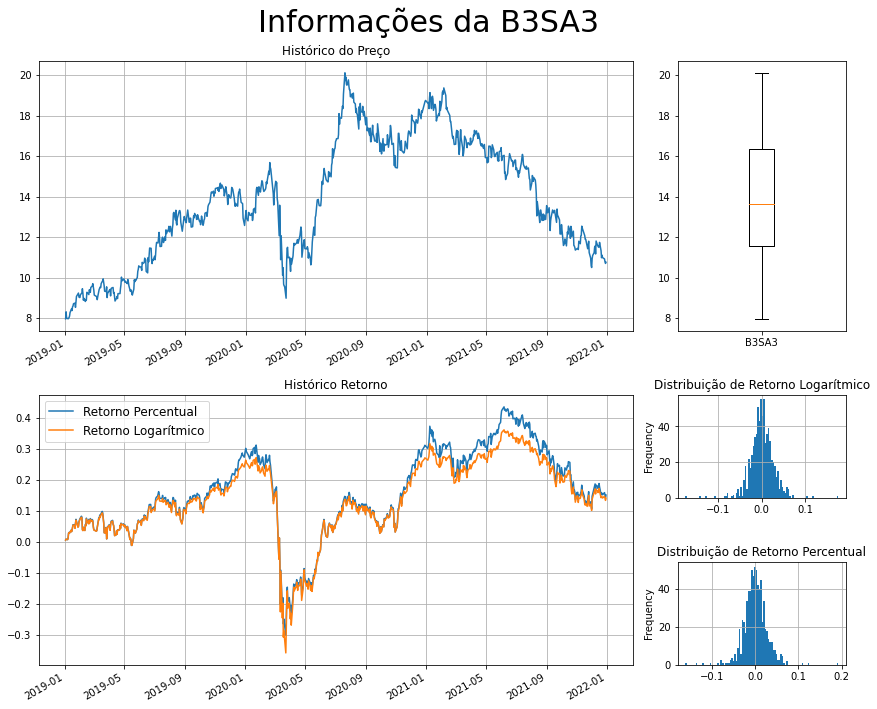

In [331]:
graficos('B3SA3')

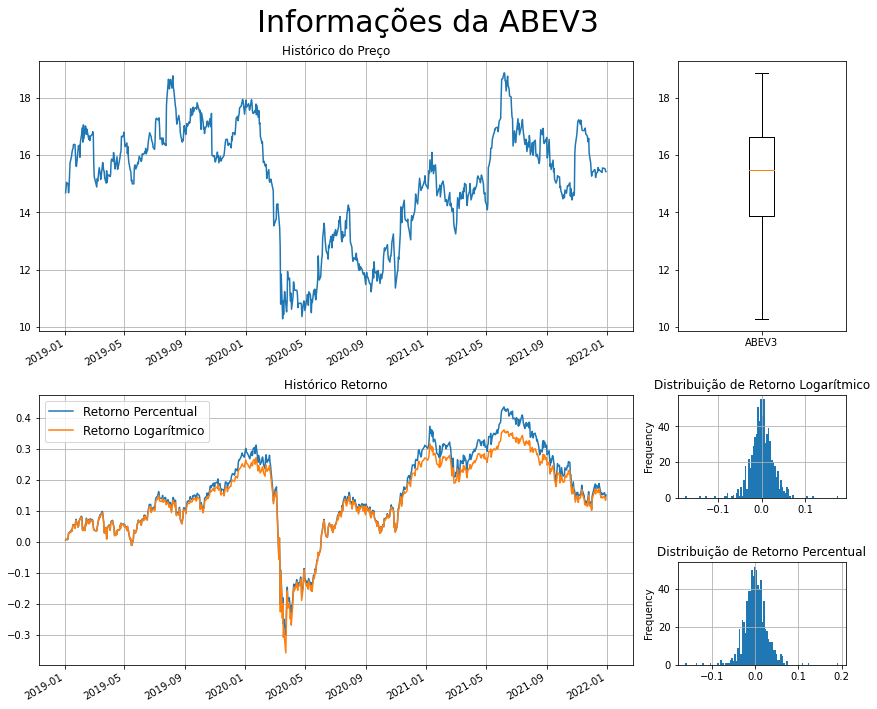

In [332]:
graficos('ABEV3')

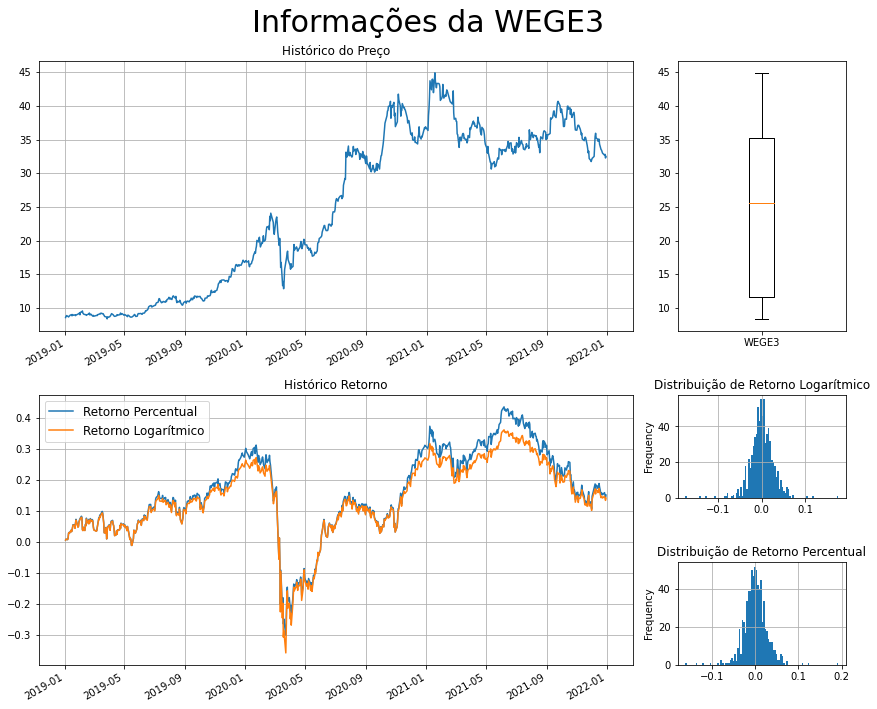

In [333]:
graficos('WEGE3')

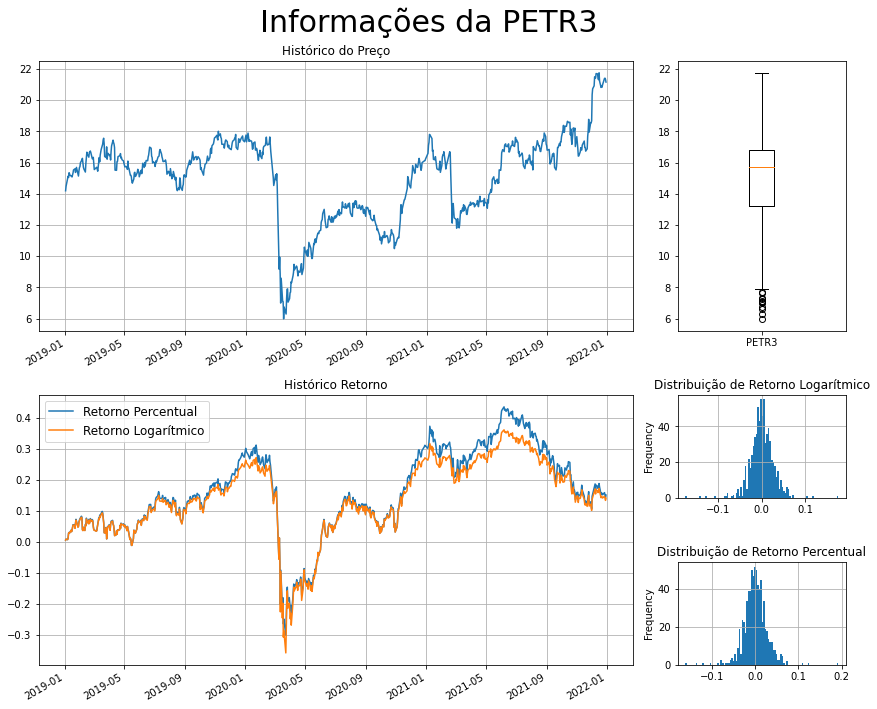

In [334]:
graficos('PETR3')

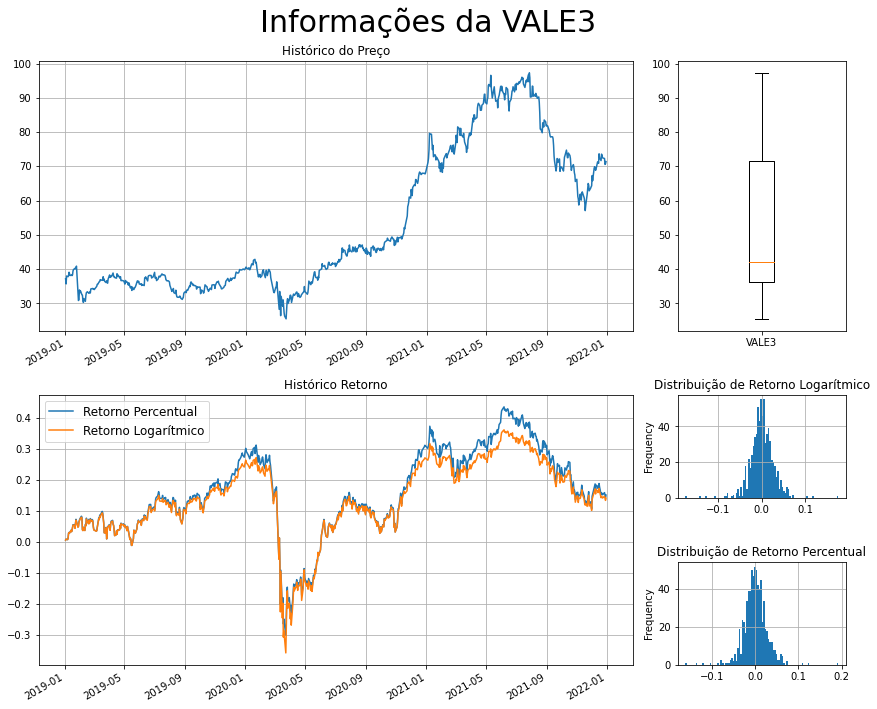

In [335]:
graficos('VALE3')

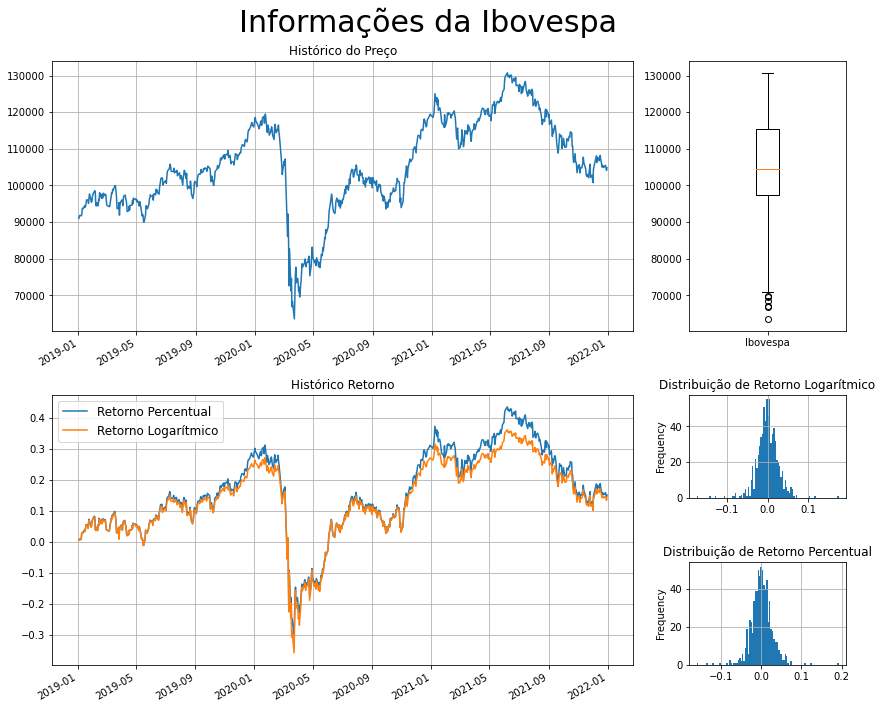

In [336]:
graficos('Ibovespa')

In [63]:
import plotly.graph_objs as go
data_inicial = "01/01/2019"
data_final = "01/01/2022"

def grafico_candle(acao, data_inicial, data_final):
    df = web.DataReader(f'{acao}.SA', data_source='yahoo', start=data_inicial, end=data_final)
    tracel = {
        'x':df.index,
        'open':df.Open,
        'close':df.Close,
        'high':df.High,
        'low':df.Low,
        'type':'candlestick',
        'name':acao,
        'showlegend':True
    }
    data = [tracel]
    layout = go.Layout()
    
    fig = go.Figure(data=data, layout=layout)
    return fig

### Q4. Crie dataframes com os retornos mensais e trimestrais das 50 ações totais e a variação do IBOVESPA. A partir desses mostre a média, mediana, variança, 1o e 3o quartil para o retorno das ações por trimestre e por mês.

In [326]:
#Criando um DataFrame com a ultima cotação de cada Mês

mes = ibrx50_novo.index.strftime('%m/%Y').drop_duplicates()
mensal = pd.DataFrame()

for m in mes:
    df1 = pd.DataFrame(ibrx50_novo[m].iloc[-1,:])
    df1 = df1.T
    mensal = pd.concat([mensal, df1], axis=0)

In [329]:
mensal.describe()

,RRRP3,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBSE3,BRML3,BBDC4,BRAP4,...,RAIL3,CSNA3,SUZB3,TOTS3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,Ibovespa
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,33.117472,14.888521,59.063061,14.842163,36.434722,13.740174,23.116427,11.199067,19.843082,28.138558,...,20.351627,20.049015,46.124259,24.142764,10.267952,52.752086,10.690278,20.844858,24.566047,104755.194444
std,4.839568,2.072133,23.388107,1.540939,12.039012,2.883459,3.033227,2.908468,3.175661,10.948095,...,2.260530,11.417889,11.745068,7.859248,4.198398,20.649036,4.805724,3.093155,11.388774,12031.239273
min,23.950001,10.582483,29.115196,12.647345,14.280000,9.023033,17.703808,7.129496,14.290248,16.151045,...,15.972528,6.526236,28.308828,10.751341,4.205211,32.286366,4.100000,13.236190,8.622395,73020.000000
25%,30.362500,13.418911,40.818252,13.726089,24.375000,11.234685,21.022923,9.406560,17.388804,18.491088,...,19.014200,11.677003,37.060423,18.451165,7.119106,36.101355,6.112500,18.488828,12.153880,96860.750000
50%,30.362500,15.438387,56.902071,13.843387,38.145000,13.761404,22.980920,10.003170,20.896948,23.253879,...,19.873261,15.140611,44.341900,24.834038,8.537591,43.177969,10.780000,20.708911,28.009743,103836.500000
75%,36.677500,16.417090,72.113907,16.076009,43.440001,16.301798,25.131007,13.417688,22.566887,38.982493,...,22.105819,28.151575,55.498151,29.097883,13.156615,68.785309,14.172500,22.935791,34.982435,114311.750000
max,45.340000,18.304552,116.970543,18.840485,59.259998,18.928871,29.825430,18.296057,24.794405,49.063004,...,26.071482,46.088249,71.229599,39.275402,19.781977,93.926453,20.500000,27.142910,40.811390,126802.000000


In [375]:
#Criando um DataFrame com a ultima cotação a cada Trimestre

mes = ibrx50_novo.index.strftime('%m/%Y').drop_duplicates()
trimestral = pd.DataFrame()
ax = 0

while ax <= mes.shape[0]:
    df1 = pd.DataFrame(mensal.iloc[ax])
    df1 = df1.T
    trimestral = pd.concat([trimestral, df1], axis=0)
    ax += 3

In [377]:
trimestral.describe()

,RRRP3,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBSE3,BRML3,BBDC4,BRAP4,...,RAIL3,CSNA3,SUZB3,TOTS3,USIM5,VALE3,VIIA3,VBBR3,WEGE3,Ibovespa
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,32.804961,15.114375,58.859141,14.752395,36.272308,13.477464,23.099669,11.386755,20.167085,27.236876,...,20.060364,19.416765,44.550346,22.869705,9.878833,50.234367,10.343077,20.902023,23.472709,103882.000000
std,4.303098,2.267974,24.215420,1.266485,12.915190,3.151489,2.691467,3.122806,3.145665,11.548787,...,2.106302,12.787690,10.635349,7.697338,4.557140,20.888040,5.011559,2.908412,12.664868,11576.133055
min,29.543000,10.582483,29.115196,13.726089,17.400000,9.023033,19.372992,7.129496,14.507071,16.151045,...,15.972528,8.377518,29.856661,10.751341,4.205211,33.112164,4.100000,16.666847,8.900228,80506.000000
25%,30.362500,14.378842,37.062397,13.726089,24.870001,11.360250,21.110247,9.496052,17.479952,18.315617,...,18.319960,11.477558,38.617989,15.707479,7.481468,36.248722,6.150000,19.557978,11.477031,96353.000000
50%,30.362500,15.922143,49.799728,13.806933,37.110001,14.161253,22.953207,9.983283,21.248005,22.104433,...,19.978146,12.689938,40.886200,24.342855,8.358875,37.552887,9.180000,20.365404,19.381428,102912.000000
75%,32.500000,16.657616,71.565712,15.765082,40.340000,15.440598,24.658337,13.459205,22.595388,36.459908,...,21.896049,22.233749,48.722725,28.017607,11.564329,65.560783,14.000000,21.951147,34.980423,113761.000000
max,43.669998,18.304552,116.970543,17.154341,59.259998,18.928871,28.525423,18.296057,23.918858,49.063004,...,23.174650,46.088249,66.848946,34.984924,19.781977,90.202568,19.520000,27.142910,40.811390,121801.000000


### Q5. Utilizando os dados diários de 01/01/2019 a 01/01/2021 crie um modelo de decomposição do IBOVESPA a partir de qualquer número das 50 ações. Justifique sua seleção se usar um subconjunto das ações.

In [662]:
#Vamos verificar qual ação tem a maior Correlação com o Ibovespa
corr = ibrx50_novo['2019':'2020'].corr()['Ibovespa']
corr = pd.DataFrame(corr)
corr.sort_values(by='Ibovespa',ascending=False).head()

,Ibovespa
Ibovespa,1.000000
PETR4,0.837077
LREN3,0.807088
VBBR3,0.800929
BBSE3,0.795954


In [663]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompo_add = seasonal_decompose(ibrx50_novo['2019':'2020'].Ibovespa,model='additive',period=30,extrapolate_trend=30)
decompo_mult = seasonal_decompose(ibrx50_novo['2019':'2020'].Ibovespa,model='multiplicative',period=30,extrapolate_trend=30)

In [665]:
#Observar a Decomposição da Ação com maior correlação com o IBOVESPA
decompo_add_PETR = seasonal_decompose(ibrx50_novo['2019':'2020'].PETR4,model='additive',period=30,extrapolate_trend=30)
decompo_mult_PETR = seasonal_decompose(ibrx50_novo['2019':'2020'].PETR4,model='multiplicative',period=30,extrapolate_trend=30)

In [666]:
tend_add = decompo_add.trend
tend_mult = decompo_mult.trend
tend_add_PETR = decompo_add_PETR.trend
tend_mult_PETR = decompo_mult_PETR.trend

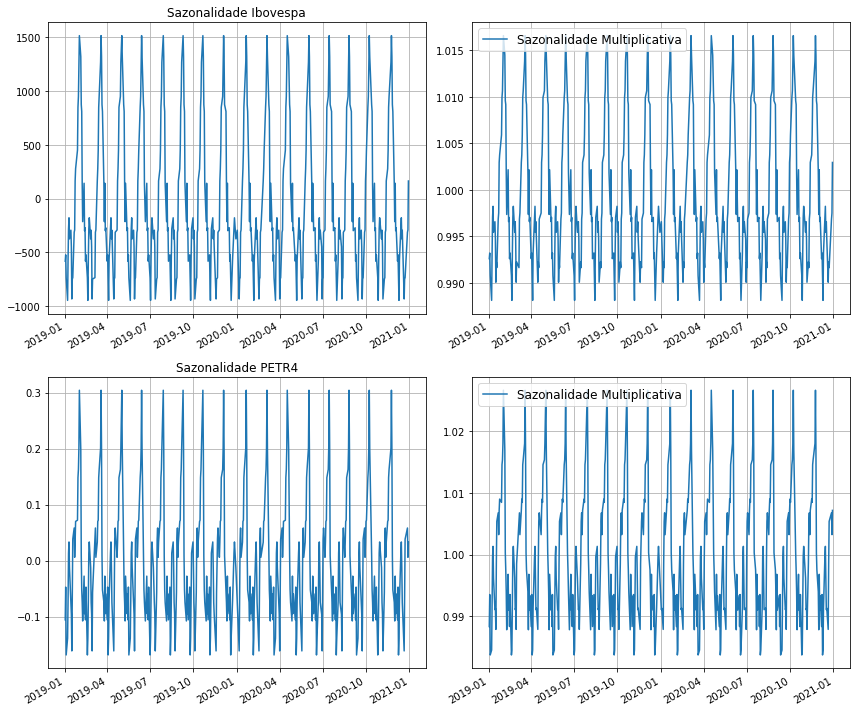

In [667]:
sazo_add = decompo_add.seasonal
sazo_mult = decompo_mult.seasonal
sazo_add_PETR = decompo_add_PETR.seasonal
sazo_mult_PETR = decompo_mult_PETR.seasonal

plt.figure(figsize=[12,10])
plt.subplot(2,2,1)
plt.title("Sazonalidade Ibovespa")
sazo_add.plot(label = 'Sazonalidade Aditiva')
plt.grid()
plt.tight_layout()
plt.subplot(2,2,2)
sazo_mult.plot(label = 'Sazonalidade Multiplicativa')
plt.legend(loc='upper left', fontsize = 12)
plt.grid()
plt.tight_layout()
plt.subplot(2,2,3)
plt.title("Sazonalidade PETR4")
sazo_add_PETR.plot(label = 'Sazonalidade Aditiva')
plt.grid()
plt.tight_layout()
plt.subplot(2,2,4)
sazo_mult_PETR.plot(label = 'Sazonalidade Multiplicativa')
plt.legend(loc='upper left', fontsize = 12)
plt.grid()
plt.tight_layout()

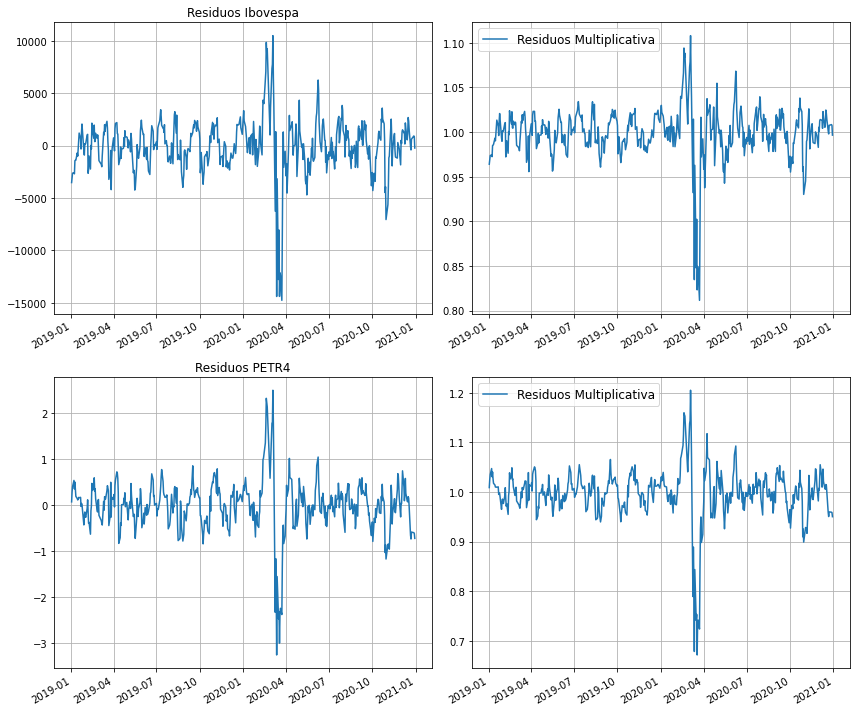

In [669]:
res_add = decompo_add.resid
res_mult = decompo_mult.resid
res_add_PETR = decompo_add_PETR.resid
res_mult_PETR = decompo_mult_PETR.resid

plt.figure(figsize=[12,10])
plt.subplot(2,2,1)
plt.title("Residuos Ibovespa")
res_add.plot(label = 'Residuos Aditiva')
plt.grid()
plt.tight_layout()
plt.subplot(2,2,2)
res_mult.plot(label = 'Residuos Multiplicativa')
plt.legend(loc='upper left', fontsize = 12)
plt.grid()
plt.tight_layout()
plt.subplot(2,2,3)
plt.title("Residuos PETR4")
res_add_PETR.plot(label = 'Residuos Aditiva')
plt.grid()
plt.tight_layout()
plt.subplot(2,2,4)
res_mult_PETR.plot(label = 'Residuos Multiplicativa')
plt.legend(loc='upper left', fontsize = 12)
plt.grid()
plt.tight_layout()

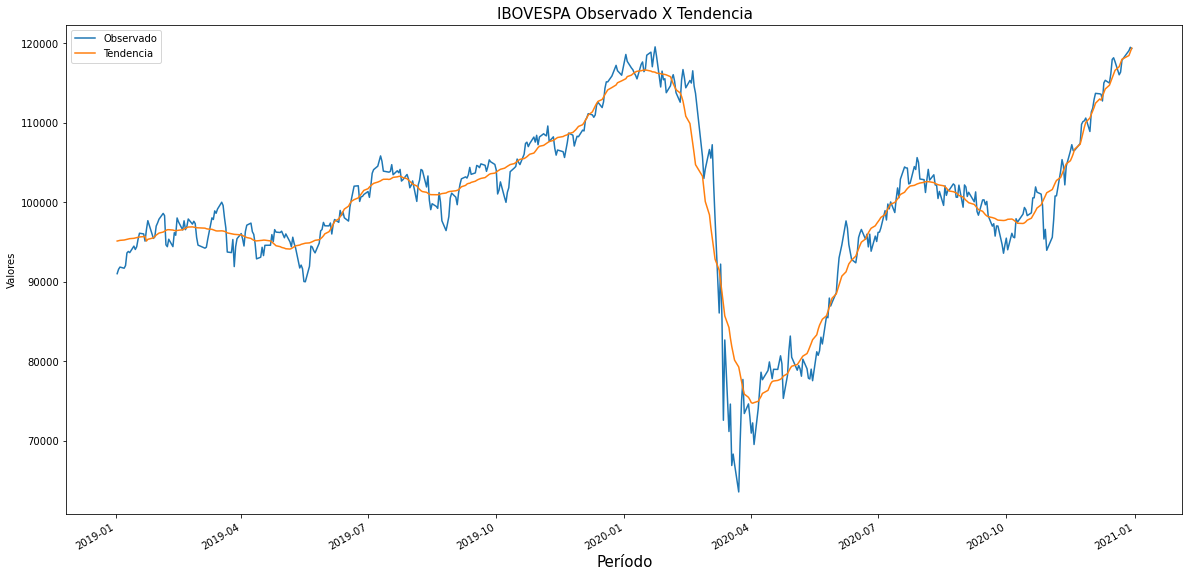

In [672]:

decompo_add.observed.plot(figsize=(20,10))
#tendência da série
decompo_add.trend.plot()
plt.title('IBOVESPA Observado X Tendencia', size=15)
plt.xlabel('Período',size=15)
plt.ylabel('Valores')
plt.legend(['Observado','Tendencia'])
plt.show()

In [626]:
#Da série vamos extrair apenas os dados de fechamento
data=ibrx50_novo['2019':'2021'].Ibovespa
#selecionar seus valores
dataset=data.values
#separa 80% desses dados
training_data_len=math.ceil(len(dataset)*.8)
#e vamos visualizar quantas observações temos
training_data_len

595

In [639]:
#escalando para o intervalo entre 0 e 1
from sklearn.preprocessing import MinMaxScaler

X = decompo_add.trend.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(X)


In [640]:
#criando um dataset de treino
train_data = scaled_data[0:training_data_len,:]
#separando dados de treino e teste
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.38026468, 0.38106268, 0.38186067, 0.38265866, 0.38345665,
       0.38425465, 0.38505264, 0.38585063, 0.38664862, 0.38744662,
       0.38824461, 0.3890426 , 0.38984059, 0.39063859, 0.39143658,
       0.38029359, 0.38432365, 0.3876282 , 0.39093214, 0.39418758,
       0.39662209, 0.398922  , 0.40130367, 0.40338973, 0.40537289,
       0.40675365, 0.40689166, 0.40607508, 0.4049716 , 0.40453393,
       0.405072  , 0.40557556, 0.40669801, 0.40869548, 0.41028294,
       0.41175664, 0.41310165, 0.41346813, 0.41280604, 0.41203422,
       0.41152289, 0.41128043, 0.41048903, 0.40915583, 0.40847012,
       0.40772783, 0.40645338, 0.4051609 , 0.40411492, 0.40387153,
       0.40418237, 0.40382273, 0.40292719, 0.40164186, 0.39937894,
       0.39722388, 0.39636222, 0.39598828, 0.39577256, 0.39560501])]
[0.39470947988467775]

[array([0.38026468, 0.38106268, 0.38186067, 0.38265866, 0.38345665,
       0.38425465, 0.38505264, 0.38585063, 0.38664862, 0.38744662,
       0.38824461, 0.3890426 , 0.38

In [641]:
x_train,y_train = np.array(x_train), np.array(y_train)
#dimensões dos arrays
print(x_train.shape)
print(y_train.shape)

(535, 60)
(535,)


In [642]:
#Redimensionamento dos dados
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(535, 60, 1)

In [643]:
#criando os dados de teste
test_data=scaled_data[training_data_len-60:,:]

#criando x_test e y_test
x_test=[]
y_test=dataset[training_data_len:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [644]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dense(25))
model.add(Dense(1))

In [647]:
model.compile(optimizer='adam', loss='mse')

In [673]:
model.fit(x_train, y_train, batch_size=60,epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
9/9 [==============================] - 11s 933ms/step - loss: 4.2246e-04 - val_loss: 265161680.0000
Epoch 2/100
9/9 [==============================] - 8s 908ms/step - loss: 4.4120e-04 - val_loss: 265161584.0000
Epoch 3/100
9/9 [==============================] - 7s 838ms/step - loss: 4.2356e-04 - val_loss: 265161648.0000
Epoch 4/100
9/9 [==============================] - 8s 876ms/step - loss: 4.1532e-04 - val_loss: 265161568.0000
Epoch 5/100
9/9 [==============================] - 8s 907ms/step - loss: 3.7312e-04 - val_loss: 265161696.0000
Epoch 6/100
9/9 [==============================] - 9s 1s/step - loss: 4.0507e-04 - val_loss: 265161568.0000
Epoch 7/100
9/9 [==============================] - 8s 860ms/step - loss: 4.4691e-04 - val_loss: 265161680.0000
Epoch 8/100
9/9 [==============================] - 7s 838ms/step - loss: 3.8516e-04 - val_loss: 265161680.0000
Epoch 9/100
9/9 [==============================] - 7s 843ms/step - loss: 3.6315e-04 - val_loss: 265161616.0000
Epo

KeyboardInterrupt: 

In [421]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

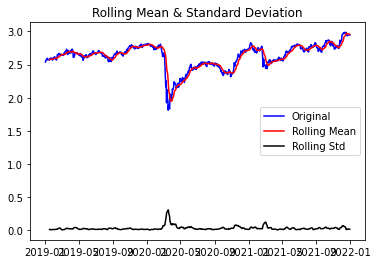

Results of Dickey-Fuller Test:
Test Statistic                  -2.785335
p-value                          0.060399
#Lags Used                       7.000000
Number of Observations Used    735.000000
Critical Value (1%)             -3.439278
Critical Value (5%)             -2.865480
Critical Value (10%)            -2.568868
dtype: float64


In [674]:
test_stationarity(df_log.PETR4)

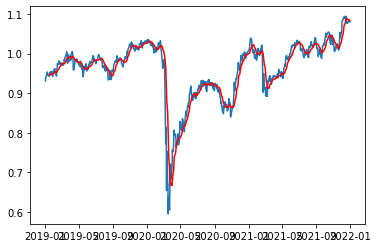

In [675]:
ts_log = np.log(df_log.PETR4)
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

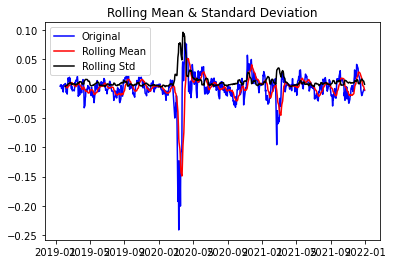

Results of Dickey-Fuller Test:
Test Statistic                -8.020982e+00
p-value                        2.076730e-12
#Lags Used                     7.000000e+00
Number of Observations Used    7.240000e+02
Critical Value (1%)           -3.439414e+00
Critical Value (5%)           -2.865540e+00
Critical Value (10%)          -2.568900e+00
dtype: float64


In [676]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)